Load Python Libraries

In [2]:
Version: 0.1

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
%matplotlib inline

Import PV Data. PV Data's format is a single column, with each number representing the kWh output of each half-hour period. 

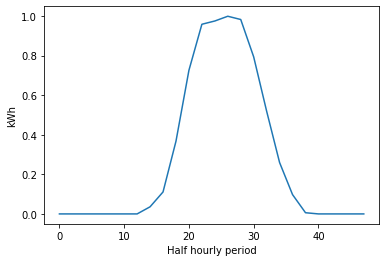

Annual Solar Generation: 3381.96 kWh


In [3]:
# import data
solar_profile = pd.read_csv("C:/Users/tangl/OneDrive/Engineering Course/Year 3/3YP/OXEMF/data/solar_example.csv", usecols=[1]).values

# plot data
plt.plot(solar_profile[4752:4800])  # just plotting a single day from the entire year
plt.ylabel("kWh")
plt.xlabel("Half hourly period")
plt.show()

# calculate annual generation
print("Annual Solar Generation: {:.2f} kWh".format(solar_profile.sum()))

Create Electrolyzer Class

In [4]:
class electrolyzer:
    def __init__(self,elec_price, production_rate,install_cost,max_power):
        self.elec_price = elec_price             #GBP Per kWh
        self.production_rate = production_rate   #kg of hydrogen produced per second per MW of electricity
        self.install_cost = install_cost         #in GBP
        self.max_power = max_power               #in MW
        
    def getOpcost(self):
        total_costs = self.elec_price
        Opcost = total_costs*self.production_rate
        return Opcost

ITM HGas3SP Electrolyzer created below

In [14]:
itm_H3GSP = electrolyzer(0.1437, (5/9), 2677440, 2)


Use a day as experimental sample

In [16]:
Test_solar = solar_profile[4752:4800]

Power = Test_solar*2*0.001                   #Average power(MW) of solar grid in the half hour period

H_produced = Power*itm_H3GSP.production_rate   #Hydrogen Produced (kg) in each half hour period


Code for Hydrogen Storage

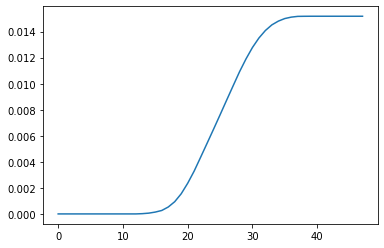

In [18]:
hydrogen_capacity = 10  # kg

T = len(Test_solar)                    # no. of half hour periods
outputi = np.zeros((T,1))  # battery energy flow
soc = np.zeros((T,1))  # weight of hydrogen stored

for j in range(T):
    if j == 0:
        socval = 0 
    else:
        socval = soc[j-1]                 #stores soc from the previous timeslot
    
    # if there is production of hydrogen
    if Test_solar[j] > 0:      
        outputi[j] = Test_solar[j]*2*0.001*itm_H3GSP.production_rate
        soc[j] = socval + outputi[j]     #battery is being discharged so soc decreases
        
    # if there is no production of hydrogen
    elif Test_solar[j] == 0: 
        soc[j] = socval                     # battery soc has no change
        
p = plt.plot(soc)
plt.show()